In [1]:
import pandas as pd
import tensorflow as tf

In [40]:
data=pd.read_csv('./data/스터디_회귀(1008)_예제 데이터.csv')

In [41]:
data.head()

,Barrel,Temp,RT_-1.8F,RT_-0.9F,RT_0.0F,RT_0.9F,RT_1.8F,HT_0.0F
0,1,105,0.338,0.277,0.521,0.325,0.289,0.611
1,1,105,0.410,0.349,0.590,0.396,0.358,0.672
2,1,105,0.513,0.460,0.687,0.506,0.462,0.755
3,1,105,0.617,0.578,0.772,0.620,0.572,0.812
4,1,105,0.715,0.704,0.836,0.738,0.686,0.840


In [58]:
X = data.drop(['HT_0.0F'], axis=1)
y = data['HT_0.0F']

In [59]:
y.head()

0    0.611
1    0.672
2    0.755
3    0.812
4    0.840
Name: HT_0.0F, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
X_train

,Barrel,Temp,RT_-1.8F,RT_-0.9F,RT_0.0F,RT_0.9F,RT_1.8F
3159,3,105,0.310,0.694,0.685,0.530,0.260
1554,2,105,0.764,0.808,0.787,0.768,0.728
4851,1,105,0.367,0.498,0.597,0.642,0.389
2318,1,105,0.759,0.828,0.694,0.796,0.690
347,1,105,0.726,0.807,0.785,0.757,0.680
...,...,...,...,...,...,...,...
5191,1,105,0.581,0.726,0.777,0.783,0.579
5226,1,105,0.590,0.569,0.426,0.699,0.546
5390,1,105,0.789,0.848,0.673,0.764,0.609
860,1,105,0.450,0.506,0.669,0.449,0.457


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)

scaler = StandardScaler()
scaler.fit(X_test)
X_test= scaler.transform(X_test)
# y_train=scaler.fit(y_train.re
# y_test=scaler.fit(y_test.reshape(-1,1))

In [64]:
X_train

array([[ 1.40512571,  0.56915534, -1.65334052, ...,  0.01660739,
        -0.57490954, -1.92472425],
       [ 0.30077364,  0.56915534,  0.9968438 , ...,  0.79336503,
         0.72138017,  0.77468472],
       [-0.80357843,  0.56915534, -1.32060813, ..., -0.65353647,
         0.03510915, -1.18065639],
       ...,
       [-0.80357843,  0.56915534,  1.14277906, ..., -0.07477587,
         0.69959379,  0.08829654],
       [-0.80357843,  0.56915534, -0.83610307, ..., -0.10523695,
        -1.01608377, -0.78843458],
       [-0.80357843, -1.51557347,  0.62908694, ...,  0.78574976,
        -1.97468456,  0.18058403]])

In [65]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=50,activation='relu',input_shape=(7,)),
    tf.keras.layers.Dense(units=45,activation='relu'),
    tf.keras.layers.Dense(units=15,activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                400       
_________________________________________________________________
dense_9 (Dense)              (None, 45)                2295      
_________________________________________________________________
dense_10 (Dense)             (None, 15)                690       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 3,401
Trainable params: 3,401
Non-trainable params: 0
_________________________________________________________________


In [66]:
history=model.fit(X_train,y_train,epochs=25,batch_size=32,validation_split=0.25)

Epoch 1/25
143/143 [==============================] - 0s 942us/step - loss: 0.0234 - val_loss: 0.0081
Epoch 2/25
143/143 [==============================] - 0s 481us/step - loss: 0.0082 - val_loss: 0.0088
Epoch 3/25
143/143 [==============================] - 0s 492us/step - loss: 0.0071 - val_loss: 0.0068
Epoch 4/25
143/143 [==============================] - 0s 471us/step - loss: 0.0067 - val_loss: 0.0060
Epoch 5/25
143/143 [==============================] - 0s 481us/step - loss: 0.0061 - val_loss: 0.0060
Epoch 6/25
143/143 [==============================] - 0s 474us/step - loss: 0.0059 - val_loss: 0.0062
Epoch 7/25
143/143 [==============================] - 0s 481us/step - loss: 0.0059 - val_loss: 0.0058
Epoch 8/25
143/143 [==============================] - 0s 481us/step - loss: 0.0059 - val_loss: 0.0059
Epoch 9/25
143/143 [==============================] - 0s 565us/step - loss: 0.0057 - val_loss: 0.0060
Epoch 10/25
143/143 [==============================] - 0s 481us/step - loss: 0.005

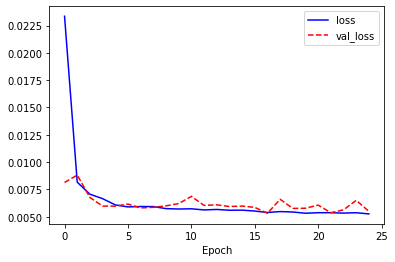

In [67]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [68]:
model.evaluate(X_test,y_test)

48/48 [==============================] - 0s 312us/step - loss: 0.0053


0.005263311788439751

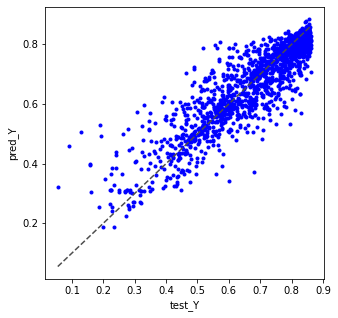

In [69]:
pred_Y=model.predict(X_test)
plt.figure(figsize=(5,5))
plt.plot(y_test,pred_Y,'b.')



plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()